In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 2

In [2]:
df = pd.read_csv('C:/Users/Khush/Desktop/Datesets/cleaned_data.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [3]:
bill_feats = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ]
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ECEA474C8>,
      dtype=object)

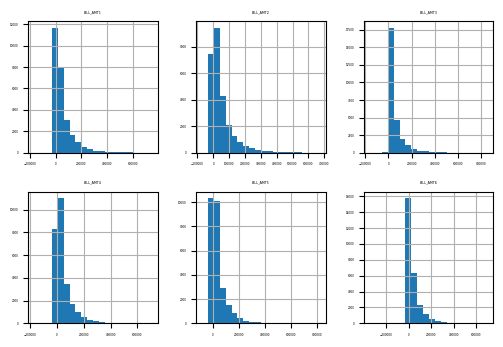

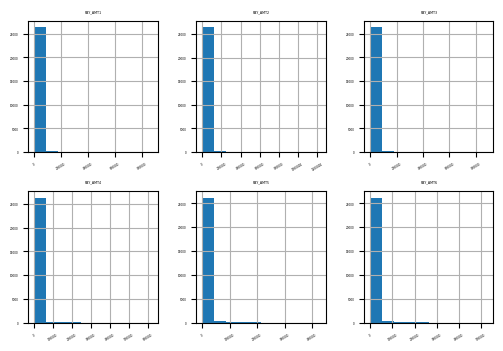

In [7]:
#Please RUN the below line one by one to obtain a better understanding
df[bill_feats].describe()
df[bill_feats].hist(layout=(2,3),bins=20)
df[pay_amt_feats].describe
df[pay_amt_feats].hist(layout=(2,3),xrot=30)

In [9]:
pdm = df[pay_amt_feats] == 0

In [10]:
pdm.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
pdm.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

In [12]:
~pdm

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,False,True,False,False,False,False
1,False,True,True,True,False,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
26659,True,True,True,True,True,True
26660,True,True,True,True,False,False
26661,False,False,True,True,True,True
26662,True,True,True,True,True,True


In [13]:
df[pay_amt_feats][pdm]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,NaN,0.0,0.0,0.0,0.0
1,0.0,NaN,NaN,NaN,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
26659,NaN,NaN,NaN,NaN,NaN,NaN
26660,NaN,NaN,NaN,NaN,0.0,0.0
26661,0.0,0.0,NaN,NaN,NaN,NaN
26662,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df[pay_amt_feats][~pdm].apply(np.log10)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,NaN,2.838219,NaN,NaN,NaN,NaN
1,NaN,3.000000,3.000000,3.000000,NaN,3.301030
2,3.181272,3.176091,3.000000,3.000000,3.000000,3.698970
3,3.301030,3.305136,3.079181,3.041393,3.028978,3.000000
4,3.301030,4.564441,4.000000,3.954243,2.838219,2.831870
...,...,...,...,...,...,...
26659,3.929419,4.301030,3.699231,3.483872,3.698970,3.000000
26660,3.264109,3.547282,3.954146,2.110590,NaN,NaN
26661,NaN,NaN,4.342423,3.623249,3.301030,3.491362
26662,4.933993,3.532627,3.071145,3.284656,4.723981,3.256237


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ECCC6EA88>,
      dtype=object)

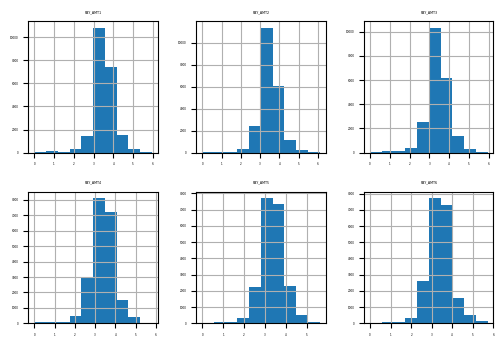

In [17]:
df[pay_amt_feats][~pdm].apply(np.log10).hist(layout=(2,3))